In [ ]:
# -*- coding: utf-8 -*-
# @Author : Bowen Su
# @Time : 2023.11.17

### 数据预览

有很多方法可以用来区分AI生成的图像和真实图像。以下是一些可能的特征和方法：

1. **质地和细节**：AI生成的图像常常在噪点和细节上有所不同。它们可能会缺乏噪点，也可能会在特定的纹理和细节上表现得过于均匀。

2. **重复的模式**：一些AI生成的图像，特别是那些使用低分辨率训练样本的模型生成的图像，可能会显示出重复的纹理或模式。

3. **不自然的色彩**：AI生成的图像有时可能会有一些不自然的颜色渲染，比如不自然的肤色、亮度和对比度等。

4. **对称性和几何规律**：有时，AI生成的图像可能过于对称，或者在某些结构上表现出不自然的规律性。

5. **艺术风格**：某些AI生成的图像可能反映出训练数据集中的特定艺术风格，这可能与现实世界的图像有所不同。

6. **不一致的光照**：AI生成的图像有时可能会显示出不一致的光照条件，例如，图像的不同部分可能看起来像是在不同的光照条件下拍摄的。

除了这些，还有一些更复杂的方法可以用来识别AI生成的图像，例如使用机器学习或深度学习算法训练一个模型来识别图像是否由AI生成。这些方法通常需要大量的训练数据，并可能涉及到复杂的特征工程和模型选择。

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imsave
from skimage.color import rgb2gray

#### 对图像进行聚类

In [106]:
def kmeans_image_segmentationRGB(input_file, clusters):
    # 读取并归一化图像
    image = imread(input_file) / 255
    width, height, _ = image.shape

    # 将图像变形为2D像素数组
    pixels = image.reshape(-1, 3)

    # 执行K-means聚类
    kmeans = KMeans(n_clusters=clusters)
    labels = kmeans.fit_predict(pixels)

    # 用聚类中心点颜色替换原像素颜色
    segmented_image = kmeans.cluster_centers_[labels]
    segmented_image = segmented_image.reshape(width, height, 3)

    # 返回聚类后的图像
    return segmented_image


# 'viridis': 默认的颜色映射，是一个在亮度和颜色变化上都表现很好的映射。
# 'plasma': 一个亮度均匀增加的映射，颜色从深蓝变化到明亮的黄色。
# 'inferno': 一个亮度均匀增加的映射，颜色从黑色变化到亮橙色和黄色。
# 'magma': 一个亮度均匀增加的映射，颜色从黑色变化到淡粉色。
# 'cividis': 一个针对色盲用户优化的颜色映射。
# 'Greys': 一个灰度颜色映射，从黑色变化到白色。
def grayscale_image(input_file):
    # 读取并归一化图像
    image = imread(input_file) / 255
    # 转换图像为灰度
    grayscale = rgb2gray(image)
    return grayscale

def kmeans_image_segmentationGRAY(input_file, clusters):
    # 先灰度化图像
    grayscale = grayscale_image(input_file)
    width, height = grayscale.shape

    # 将图像变形为2D像素数组
    pixels = grayscale.reshape(-1, 1)

    # 执行K-means聚类
    kmeans = KMeans(n_clusters=clusters)
    labels = kmeans.fit_predict(pixels)

    # 创建一个颜色映射，将每个聚类标签映射到一个不同的颜色
    cmap = plt.get_cmap('magma')
    colors = cmap(np.linspace(0, 1, clusters))

    # 用聚类中心点颜色替换原像素颜色
    segmented_image = colors[labels]
    segmented_image = segmented_image.reshape(width, height, -1)

    # 返回聚类后的图像
    return segmented_image

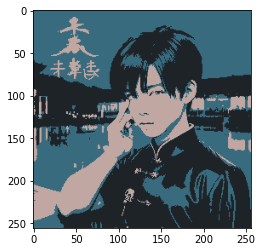

<class 'numpy.ndarray'>


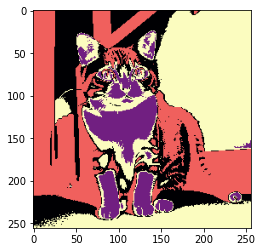

In [116]:
# 执行函数并显示结果
plt.figure
segmented_imageRGB = kmeans_image_segmentationRGB('./dataset/fake_train/fake_train_1.jpg', 3)
plt.imshow(segmented_imageRGB)
plt.show()

plt.figure
segmented_imageGRAY = kmeans_image_segmentationGRAY('./dataset/train/fake/fake_train_996.jpg', 4)
print(type(segmented_imageGRAY))
plt.imshow(segmented_imageGRAY)
plt.show()


#### 对图像进行边缘强化

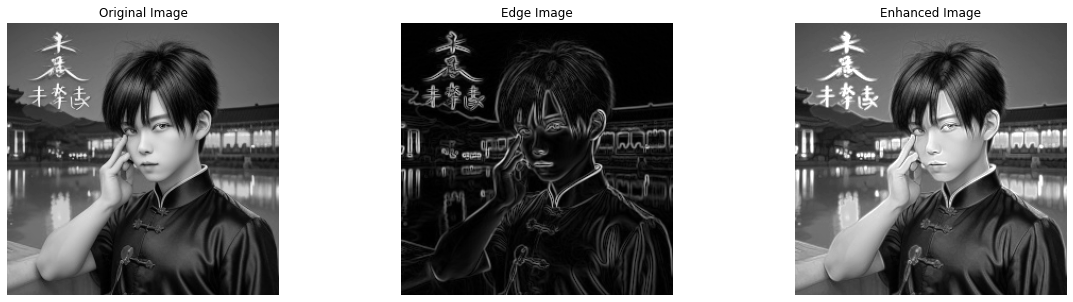

In [6]:
from skimage import util
from skimage import io, filters

def enhance_edges(image_path):
    # 读取图像
    image = io.imread(image_path, as_gray=True)
    
    # 使用Sobel算子检测边缘
    edges = filters.sobel(image)
    
    # 将边缘信息添加到原图上，并进行归一化
    combined = np.clip(image + edges, 0, 1)
    enhanced_image = util.img_as_ubyte(combined)
    
    return edges, enhanced_image

# 测试函数并显示结果
edges, enhanced_image = enhance_edges('./dataset/fake_train/fake_train_1.jpg')
'./dataset/real_train/real_train_33.jpg'
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].imshow(io.imread('./dataset/fake_train/fake_train_1.jpg', as_gray=True), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Image')
axs[2].imshow(enhanced_image, cmap='gray')
axs[2].set_title('Enhanced Image')

for ax in axs:
    ax.axis('off')

plt.show()

In [7]:
from skimage import filters, util, img_as_float
from skimage.filters import unsharp_mask

# 使用不同的边缘检测算子
# 使用了 Sobel 算子, Prewitt, Roberts, Canny 等。
def enhance_edges(image_path):
    # 读取图像
    image = io.imread(image_path, as_gray=True)
    
    # 使用Sobel算子检测边缘
    edges = filters.prewitt(image)
    
    # 对边缘图像进行锐化处理
    edges = unsharp_mask(edges, radius=1.0, amount=1.0)
    
    # 将边缘信息添加到原图上，并进行归一化
    combined = np.clip(image + 2.0*edges, 0, 1)
    enhanced_image = util.img_as_ubyte(combined)
    
    return edges, enhanced_image

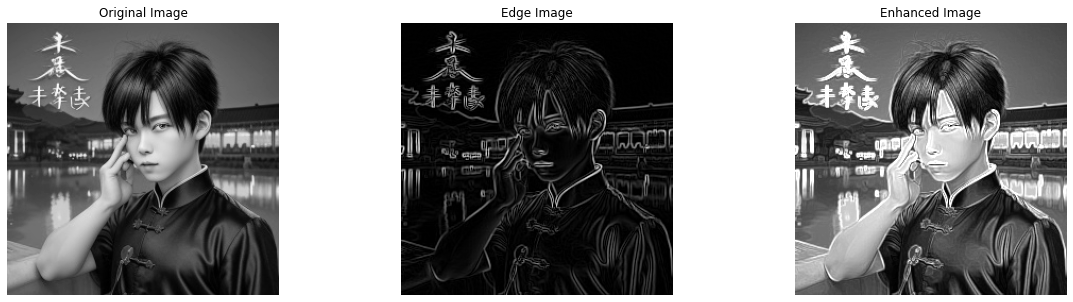

In [8]:
# 测试函数并显示结果
edges, enhanced_image = enhance_edges('./dataset/fake_train/fake_train_1.jpg')
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].imshow(io.imread('./dataset/fake_train/fake_train_1.jpg', as_gray=True), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Image')
axs[2].imshow(enhanced_image, cmap='gray')
axs[2].set_title('Enhanced Image')

for ax in axs:
    ax.axis('off')

plt.show()

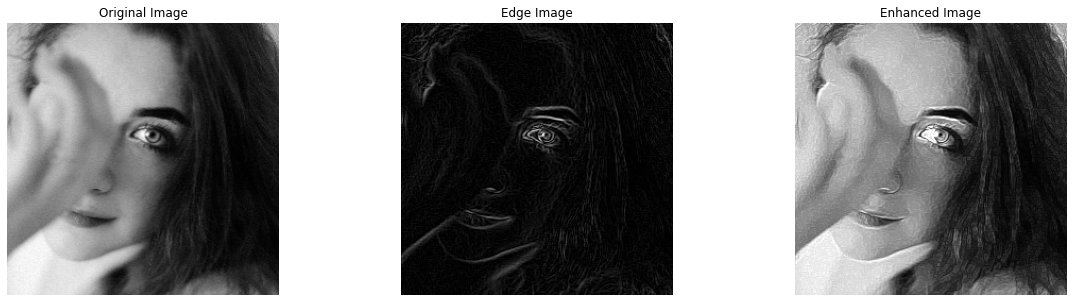

In [9]:
edges, enhanced_image = enhance_edges('./dataset/real_train/real_train_7941.jpg')
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].imshow(io.imread('./dataset/real_train/real_train_7941.jpg', as_gray=True), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Image')
axs[2].imshow(enhanced_image, cmap='gray')
axs[2].set_title('Enhanced Image')

for ax in axs:
    ax.axis('off')

plt.show()

#### 对图片的噪声进行判断

##### 统计分析方式判断噪声

In [10]:
import cv2
import numpy as np

def noise_ratio(image_path, threshold=30, noise_ratio_threshold=0.01):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the absolute difference between each pixel and its mean
    mean_img = cv2.blur(img, (5,5))
    diff_img = cv2.absdiff(img, mean_img)

    # Find the pixels with a difference greater than the threshold
    noise_pixels = np.where(diff_img > threshold, 1, 0)
    
    # Calculate the noise ratio
    noise_ratio = np.sum(noise_pixels) / (img.shape[0] * img.shape[1])

    # Convert the noise ratio to a percentage
    noise_percentage = noise_ratio * 100

    # Determine whether there is too much noise
    if noise_percentage > noise_ratio_threshold * 100:
        return noise_percentage, True
    else:
        return noise_percentage, False

image_path = './dataset/real_train/real_train_7910.jpg'
threshold = 30      # 阈值
noise_percentage, is_noise = noise_ratio(image_path=image_path, threshold=threshold)
print(f'{noise_percentage}%', is_noise)


11.83929443359375% True


##### 频域分析方式判断噪声

In [11]:
import cv2
import numpy as np

def high_frequency_ratio(image_path, threshold=0.1):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the Fourier Transform of the image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # Calculate the magnitude spectrum (energy)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the total energy
    total_energy = np.sum(magnitude_spectrum**2)

    # Set a frequency threshold to separate high and low frequencies
    freq_threshold = 30  # Adjust as needed

    # Calculate the high frequency energy
    high_freq_energy = np.sum(magnitude_spectrum[freq_threshold: -freq_threshold, freq_threshold: -freq_threshold]**2)

    # Calculate the high frequency ratio
    high_freq_ratio = high_freq_energy / total_energy

    # Determine whether there is too much high frequency noise
    if high_freq_ratio > threshold:
        return high_freq_ratio, True
    else:
        return high_freq_ratio, False

# 如果高频成分的能量是总能量的一半, high_freq_ratio就会是0.5。
high_frequency_ratio(image_path=image_path, threshold=0.1)

(0.61678081406836, True)

当 way=0 时，我们计算图像的局部方差。局部方差是图像中每个像素与其邻域像素的平均强度之间的平均差值的平方。该值越大，图像的噪声级别越高。

当 way=1 时，我们计算峰值信噪比（PSNR）。PSNR 是一个评估图像质量的指标，它比较原始图像和经过某种处理（例如噪声减小）后的图像。在这种情况下，我们将原始图像与其模糊版本进行比较，以估算噪声水平。

当 way=2 时，我们计算结构相似性指数（SSIM）。SSIM 是一种评估两个图像视觉相似度的指标。在这种情况下，我们比较原始图像和其模糊版本。如果 SSIM 接近 1，那么两个图像是非常相似的，这意味着原始图像的噪声水平较低。如果 SSIM 较小，那么图像的噪声水平可能较高。

In [24]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def noise_detection(image_path, way=0, threshold=50):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if way == 0:
        # Local variance estimation
        mean_sq = cv2.blur(img**2, (5,5))
        mean_ = cv2.blur(img, (5,5))
        variance = mean_sq - mean_**2
        noise_metric = np.mean(variance)

    elif way == 1:
        # Peak Signal to Noise Ratio (PSNR)
        mse = np.mean((img - cv2.blur(img, (5,5)))**2)
        if mse == 0:
            return float('inf'), False
        noise_metric = 20 * np.log10(255.0 / np.sqrt(mse))

    elif way == 2:
        # Structural Similarity Index (SSIM)
        noise_metric = ssim(img, cv2.blur(img, (5,5)), data_range=img.max()-img.min())

    else:
        raise ValueError("Invalid way. It must be 0, 1, or 2.")

    is_noisy = noise_metric > threshold
    return noise_metric, is_noisy
    
noise_detection(image_path=image_path, way=0)

(129.5199432373047, True)

0.0414581298828125


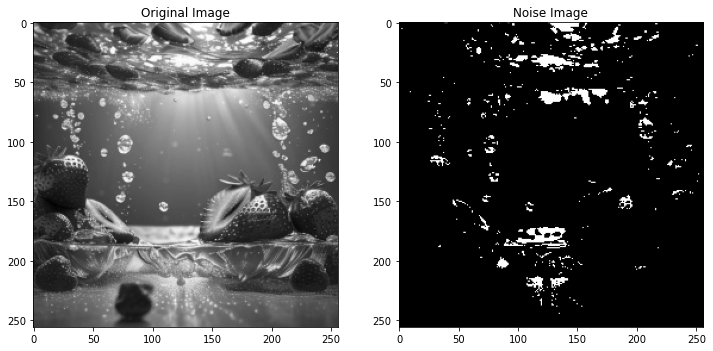

0.6314239501953125


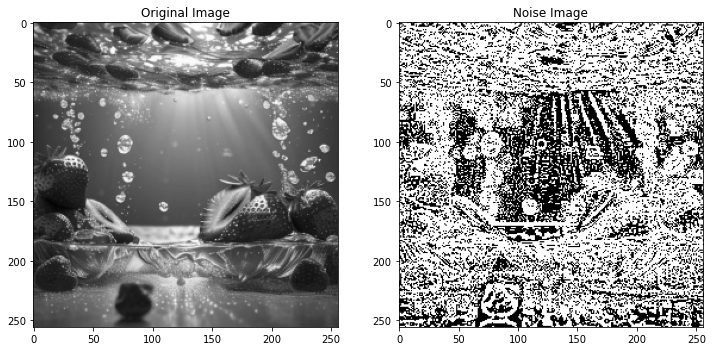

0.09271240234375


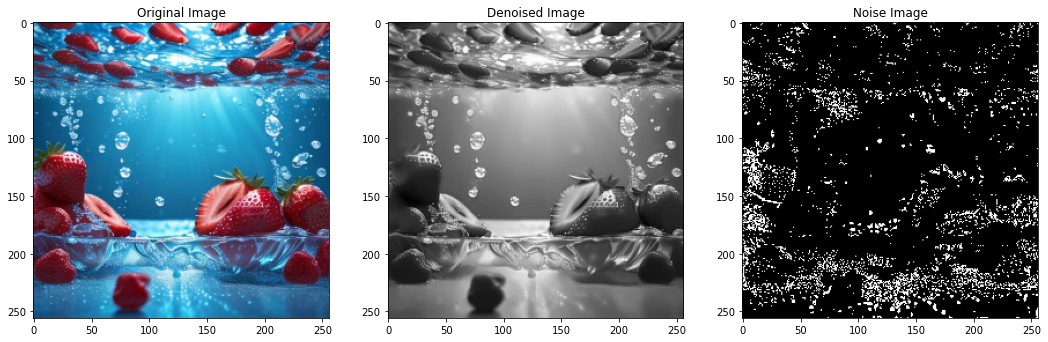

0.107696533203125


(array([[[255, 211, 127],
         [236, 186, 109],
         [196, 144,  76],
         ...,
         [176, 152, 255],
         [137, 121, 220],
         [ 82,  72, 167]],
 
        [[255, 232, 144],
         [255, 221, 138],
         [252, 191, 118],
         ...,
         [156, 138, 248],
         [104,  98, 200],
         [ 49,  52, 147]],
 
        [[255, 229, 136],
         [255, 217, 130],
         [255, 200, 124],
         ...,
         [131, 121, 230],
         [ 69,  67, 174],
         [ 41,  43, 149]],
 
        ...,
 
        [[114,  71,   0],
         [114,  71,   0],
         [114,  71,   0],
         ...,
         [115,  70,  27],
         [108,  63,  22],
         [103,  59,  15]],
 
        [[112,  69,   0],
         [112,  69,   0],
         [112,  69,   0],
         ...,
         [120,  75,  30],
         [110,  65,  25],
         [103,  59,  15]],
 
        [[109,  66,   0],
         [109,  66,   0],
         [107,  64,   0],
         ...,
         [115,  70,  27],
  

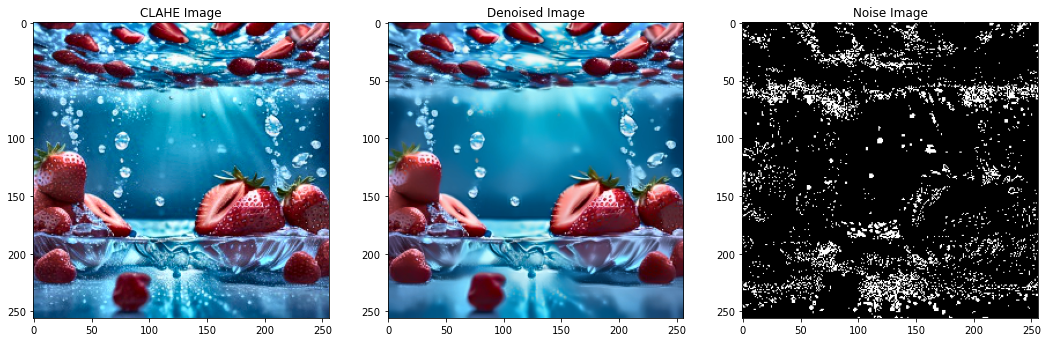

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def noise_detection_16_30(image_path, k=2.0, noise_ratio_threshold=0.01):
    # 读取图像
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 计算图像的平均值和标准差
    mean = np.mean(img)
    std = np.std(img)

    # 检测噪声
    noise_img = np.zeros_like(img)
    noise_img[img > mean + k * std] = 255

    # 计算噪声比例
    noise_ratio = np.sum(noise_img == 255) / (img.shape[0] * img.shape[1])

    # 判断是否存在大量噪声
    is_noisy = noise_ratio > noise_ratio_threshold
    print(noise_ratio)

    # 显示原始图像和噪声图像
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(noise_img, cmap='gray')
    axs[1].set_title('Noise Image')
    plt.show()

    return img, noise_img, is_noisy

def noise_detection_16_50(image_path, k=2.0, noise_ratio_threshold=0.05):
    # 读取图像
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # 计算每个像素的局部均值和标准差
    mean = cv2.blur(img, (5, 5))
    std = cv2.blur((img - mean)**2, (5, 5))**0.5

    # 检测噪声
    noise_img = np.zeros_like(img)
    noise_img[abs(img - mean) > k * std] = 255

    # 计算噪声比例
    noise_ratio = np.sum(noise_img == 255) / (img.shape[0] * img.shape[1])

    # 判断是否存在大量噪声
    is_noisy = noise_ratio > noise_ratio_threshold
    print(noise_ratio)

    # 显示原始图像和噪声图像
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(noise_img, cmap='gray')
    axs[1].set_title('Noise Image')
    plt.show()

    return img, noise_img, is_noisy

def noise_detection_17_05(image_path, h=10, noise_ratio_threshold=0.05):
    # 读取图像
    img = cv2.imread(image_path)

    # 转换为Lab色彩空间
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

    # 只提取L通道（亮度信息）
    l_channel, _, _ = cv2.split(img_lab)

    # 使用非局部均值算法去噪
    dst = cv2.fastNlMeansDenoising(l_channel, h=h)

    # 计算噪声图像
    noise_img = cv2.absdiff(l_channel, dst)

    # 使用OTSU阈值法二值化噪声图像
    _, noise_img_bin = cv2.threshold(noise_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 计算噪声比例
    noise_ratio = np.sum(noise_img_bin == 255) / (l_channel.shape[0] * l_channel.shape[1])

    # 判断是否存在大量噪声
    is_noisy = noise_ratio > noise_ratio_threshold
    print(noise_ratio)

    # 显示原始图像、去噪后图像和噪声图像
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[1].imshow(dst, cmap='gray')
    axs[1].set_title('Denoised Image')
    axs[2].imshow(noise_img_bin, cmap='gray')
    axs[2].set_title('Noise Image')
    plt.show()

    return img, dst, noise_img_bin, is_noisy

def noise_detection_17_40(image_path, h=12.5, noise_ratio_threshold=0.1825):
    # 读取图像
    img = cv2.imread(image_path)

    # 转换为Lab色彩空间
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

    # 分离L, a, b通道
    l_channel, a_channel, b_channel = cv2.split(img_lab)

    # 对L通道进行CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l_channel = clahe.apply(l_channel)

    # 重新合并L, a, b通道
    img_clahe = cv2.merge([l_channel, a_channel, b_channel])
    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_Lab2BGR)

    # 使用非局部均值算法去噪
    dst = cv2.fastNlMeansDenoisingColored(img_clahe, h=h)

    # 计算噪声图像
    noise_img = cv2.absdiff(img_clahe, dst)

    # 转换噪声图像为灰度图，然后进行二值化
    noise_img_gray = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)
    _, noise_img_bin = cv2.threshold(noise_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 计算噪声比例
    noise_ratio = np.sum(noise_img_bin == 255) / (img_clahe.shape[0] * img_clahe.shape[1])
    print(noise_ratio)

    # 判断是否存在大量噪声
    noise_level = ""
    is_noisy = noise_ratio > noise_ratio_threshold
    if noise_ratio > noise_ratio_threshold * 1.10:
        noise_level = "3"
    elif noise_ratio > noise_ratio_threshold * 1.05:
        noise_level = "2"
    elif noise_ratio > noise_ratio_threshold:
        noise_level = "1"
    else:
        noise_level = "0"

    # 显示原始图像、去噪后图像和噪声图像
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
    axs[0].set_title('CLAHE Image')
    axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Denoised Image')
    axs[2].imshow(noise_img_bin, cmap='gray')
    axs[2].set_title('Noise Image')
    # plt.show()

    return img_clahe, dst, noise_img_bin, noise_ratio, is_noisy, noise_level

# def noise_detection_11_00(image_path, h=12.5, noise_ratio_threshold=0.15):
#     # 读取图像
#     # img = cv2.imread(image_path)
#     # print(type(img))
#     img = kmeans_image_segmentationGRAY(image_path, 2)
#     img = img.astype(np.float32)

#     # 转换为Lab色彩空间
#     img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#     # 分离L, a, b通道
#     # l_channel, a_channel, b_channel = cv2.split(img_lab)
#     # l_channel = l_channel.astype(np.float32)
#     l_channel, a_channel, b_channel = cv2.split(img_lab)
#     l_channel = l_channel.astype(np.uint8)  # Change this line
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     l_channel = clahe.apply(l_channel)
#     a_channel = a_channel.astype(np.uint8)  # Add these lines
#     b_channel = b_channel.astype(np.uint8)

#     # 对L通道进行CLAHE
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     l_channel = clahe.apply(l_channel)

#     # 重新合并L, a, b通道
#     img_clahe = cv2.merge([l_channel, a_channel, b_channel])
#     img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_Lab2BGR)

#     # 使用非局部均值算法去噪
#     dst = cv2.fastNlMeansDenoisingColored(img_clahe, h=h)

#     # 计算噪声图像
#     noise_img = cv2.absdiff(img_clahe, dst)

#     # 转换噪声图像为灰度图，然后进行二值化
#     noise_img_gray = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)
#     _, noise_img_bin = cv2.threshold(noise_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
#     # 计算噪声比例
#     noise_ratio = np.sum(noise_img_bin == 255) / (img_clahe.shape[0] * img_clahe.shape[1])
#     print(noise_ratio)

#     # 判断是否存在大量噪声
#     is_noisy = noise_ratio > noise_ratio_threshold

#     # 显示原始图像、去噪后图像和噪声图像
#     fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#     axs[0].imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
#     axs[0].set_title('CLAHE Image')
#     axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
#     axs[1].set_title('Denoised Image')
#     axs[2].imshow(noise_img_bin, cmap='gray')
#     axs[2].set_title('Noise Image')
#     # plt.show()

#     return img_clahe, dst, noise_img_bin, noise_ratio, is_noisy 

# real_train_1358

noise_detection_image_path = './dataset/fake_train/fake_train_1439.jpg'
noise_detection_16_30(noise_detection_image_path)
noise_detection_16_50(noise_detection_image_path)
noise_detection_17_05(noise_detection_image_path)
noise_detection_17_40(noise_detection_image_path)
# noise_detection_11_00(noise_detection_image_path)

In [ ]:
import os
import csv

def process_directory(image_directory, output_csv_path):
    # 创建CSV文件，并写入列名
    with open(output_csv_path, 'w', newline='') as csvfile:
        fieldnames = ['image_path', 'is_noisy', 'noise_ratio', 'noise_level']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # 遍历文件夹中的所有文件
        for filename in os.listdir(image_directory):
            # 检查文件是否为图片
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                image_path = os.path.join(image_directory, filename)

                # 进行噪声检测
                _, _, _, noise_ratio, is_noisy, noise_level = noise_detection_17_40(image_path)

                # 将结果写入CSV文件
                writer.writerow({'image_path': image_path, 'noise_ratio': noise_ratio, 'is_noisy': is_noisy, 'noise_level': noise_level})

# 调用函数
process_directory('./dataset/train/real/', './output_files/noise/noise_real_GOOD.csv')

#### 使用Python来判断一张图像中是否具有重复的纹理或模式——自相关程度判断

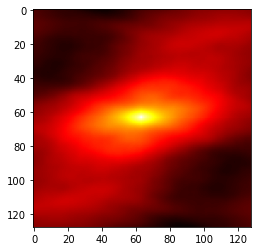

False


(array([[-1192.85752431, -1243.55647099, -1288.64052634, ...,
           727.34322807,   691.54571064,   670.36839458],
        [-1135.69030201, -1186.24124799, -1227.06976478, ...,
           793.14473355,   756.78900459,   729.85651519],
        [-1059.44497818, -1107.79617865, -1143.75774774, ...,
           897.83250798,   860.13694611,   834.65206855],
        ...,
        [  756.78900459,   793.14473355,   835.84135005, ...,
         -1186.24124799, -1135.69030201, -1082.63355215],
        [  691.54571064,   727.34322807,   765.15102253, ...,
         -1243.55647099, -1192.85752431, -1136.30500468],
        [  669.49225281,   696.22410224,   711.08242707, ...,
         -1266.92665178, -1213.51788962, -1154.92962891]]),
 False,
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]))

In [82]:
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
import cv2

from scipy.ndimage import label
from skimage.filters import gabor
from skimage.filters import threshold_otsu

def detect_repeating_patterns(image_path, size=(128, 128), threshold=1.0):
    # 以灰度模式加载图像
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 将图像缩小到较小的尺寸以加快计算速度
    img = cv2.resize(img, size)

    # 将图像归一化到0-1范围
    img = img / 255.0

    # 减去均值并除以标准差以归一化图像
    img = (img - np.mean(img)) / np.std(img)

    # 计算图像的自相关函数
    correlation = correlate2d(img, img, mode='same')  # 将模式改为'same'

    # 显示自相关图
    plt.imshow(correlation, cmap='hot')
    plt.show()

    # 应用阈值
    thresholded = correlation > threshold

    # 找出所有超过阈值的区域
    labeled, num_labels = label(thresholded)

    # 判断图像是否具有重复的纹理或模式
    has_repeating_patterns = num_labels > 1
    print(has_repeating_patterns)
    return correlation, has_repeating_patterns, labeled


def detect_repeating_patterns_21_30(image_path, size=(128, 128), threshold=1.0):
    # 以灰度模式加载图像
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 将图像缩小到较小的尺寸以加快计算速度
    img = cv2.resize(img, size)

    # 将图像归一化到0-1范围
    img = img / 255.0

    # 减去均值并除以标准差以归一化图像
    img = (img - np.mean(img)) / np.std(img)

    # 计算图像的自相关函数
    correlation = correlate2d(img, img, mode='same')

    # 显示自相关图
    # plt.imshow(correlation, cmap='hot')
    # plt.show()

    # 应用阈值
    thresholded = correlation > threshold

    # 找出所有超过阈值的区域
    labeled, num_labels = label(thresholded)

    # 判断图像是否具有重复的纹理或模式
    has_repeating_patterns = num_labels > 1
    # print(has_repeating_patterns)

    return correlation, has_repeating_patterns, labeled

# real_271
image_path = './dataset/train/fake/fake_train_271.jpg'
detect_repeating_patterns(image_path, size=(128, 128), threshold=1.0)
detect_repeating_patterns_21_30(image_path, size=(128, 128), threshold=1.0)
# detect_repeating_patterns(image_path='./dataset/fake_train/fake_train_8.jpg', size=(128, 128), threshold=1.0)

In [83]:
import pandas as pd
def process_images_in_folder(folder_path):
    # 创建一个空的DataFrame，用于存储结果
    results = pd.DataFrame(columns=['image_path', 'has_repeating_patterns'])

    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder_path):
        # 只处理jpg和png文件
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            try:
                # 对每个图像执行函数
                _, has_repeating_patterns, _ = detect_repeating_patterns_21_30(image_path)
                print(has_repeating_patterns)

                # 将结果添加到DataFrame
                results = results.append({
                    'image_path': image_path,
                    'has_repeating_patterns': has_repeating_patterns
                }, ignore_index=True)

            except Exception as e:
                print(f'Error processing file {image_path}: {e}')

    # 将结果保存到csv文件
    results.to_csv('./output_files/selfRrelevance/fake_selfRrelevance.csv', index=False)

process_images_in_folder('./dataset/train/fake')

True
False
False
False
True
False
False
False
False
True
False
True
False
False
True
True
False
False
False
True
True
False
False
False
True
True
False
False
True
True
False
False
True
True
True
False
False
False
False
True
True
True
True
False
True
True
True
True
False
True
True
True
False
True
True
False
False
True
False
False
True
False
False
False
True
False
True
False
True
False
True
False
False
False
False
False
True
False
True
True
True
True
True
False
False
False
True
True
False
False
False
False
True
True
False
False
True
True
False
True
False
True
False
True
False
False
False
True
False
False
True
True
True
False
True
False
True
True
True
True
False
True
True
True
True
False
False
True
True
False
False
False
True
True
False
False
True
True
False
True
False
True
True
True
False
False
False
True
True
True
False
False
True
False
False
True
False
True
True
False
False
False
False
True
False
False
True
False
True
True
False
True
True
True
True
True
True
True
False
False
True
False

##### 使用Python来检测一张图片是否具有不自然的颜色渲染，如不自然的亮度和对比度等

人工智能（AI）生成的图像，特别是使用生成对抗网络（GANs）等技术生成的图像，是由机器学习模型生成的，这些模型通常会学习并尝试复制真实图像数据的分布。因此，如果模型训练得当，其生成的图像可能在某些方面（如颜色分布、纹理等）上显得更加“理想化”或“一致”。

例如，人工生成的图像可能会有以下特性：

- 颜色分布可能更均匀或更一致，因为模型可能学习到了训练数据中的主导颜色和颜色组合。
- 纹理可能更加平滑，因为模型可能会“模糊”过于复杂或不常见的纹理。
- 在亮度和对比度方面，人工生成的图像可能更加统一，因为模型可能已经学习到了训练数据中常见的亮度和对比度范围。

由于这些原因，AI生成的图像可能会被认为更“自然”，因为他们可能更接近算法所认为的“自然”图像的平均值或模式。

然而，这并不意味着AI生成的图像在所有方面都比真实图像更自然。例如，AI生成的图像可能在细节处理、局部一致性等方面存在问题，这可能导致在人眼中它们看起来并不自然，尽管在颜色和纹理等特性上它们可能看起来很自然。

In [269]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_natural_color_histogram_advanced(image_path, threshold=0.3, brightness_threshold=(45, 195), contrast_threshold=(45, 195)):
    # 加载图像
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # 将图像从BGR转化为HSV

    # 计算亮度和对比度
    brightness = img[...,2].mean()
    contrast = img[...,2].std()
    print(brightness, contrast)
    if not (brightness_threshold[0] <= brightness <= brightness_threshold[1] and contrast_threshold[0] <= contrast <= contrast_threshold[1]):
        return False

    # 计算颜色直方图
    color = ('h', 's', 'v')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([img], [i], None, [256], [0, 256])

        # 计算直方图的熵
        hist_normalized = histogram.ravel()/histogram.sum()
        hist_normalized = hist_normalized[hist_normalized>0]
        entropy = -1 * (hist_normalized * np.log2(hist_normalized)).sum()
        
        # 如果熵值低于阈值，则判定为不自然的颜色渲染
        if entropy < threshold:
            return False
    return True


def is_natural_color_histogram_advanced_14_00(
    image_path,
    # threshold=0.3, 
    # brightness_threshold=(45, 195), 
    # contrast_threshold=(45, 195), 
    # saturation_threshold=(55, 175)
    ):

    # 加载图像
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # 将图像从BGR转化为HSV

    # 计算亮度和对比度
    brightness = img[...,2].mean()
    contrast = img[...,2].std()
    # brightness_check = brightness_threshold[0] <= brightness <= brightness_threshold[1]
    # contrast_check = contrast_threshold[0] <= contrast <= contrast_threshold[1]

    # 计算饱和度，并与阈值进行比较
    saturation = img[...,1].mean()
    # saturation_check = saturation_threshold[0] <= saturation <= saturation_threshold[1]

    # 计算颜色直方图
    color = ('h', 's', 'v')
    entropy_values = []
    # entropy_check = []
    for i, col in enumerate(color):
        histogram = cv2.calcHist([img], [i], None, [256], [0, 256])

        # 计算直方图的熵
        hist_normalized = histogram.ravel() / histogram.sum()
        hist_normalized = hist_normalized[hist_normalized > 0]
        entropy = -1 * (hist_normalized * np.log2(hist_normalized)).sum()
        entropy_values.append(entropy)
        # entropy_check.append(entropy >= threshold)

    # 综合判断
    checks = {
        'brightness': brightness,
        'contrast': contrast,
        'saturation': saturation,
        'h_entropy': entropy_values[0],
        's_entropy': entropy_values[1],
        'v_entropy': entropy_values[2]
        # 'is_natural': all([brightness_check, contrast_check, saturation_check, all(entropy_check)])
    }

    return checks

image_path = './dataset/fake_train/fake_train_7557.jpg'
# is_natural_color_histogram_advanced(image_path=image_path)
is_natural_color_histogram_advanced_14_00(image_path=image_path)

{'brightness': 90.83363342285156,
 'contrast': 46.35992451560585,
 'saturation': 101.486328125,
 'h_entropy': 6.880619049072266,
 's_entropy': 7.538421630859375,
 'v_entropy': 7.431844711303711}

In [273]:
from tqdm import tqdm

# 将指定文件夹中的所有图片的结果保存到一个CSV文件中
def process_images_in_folder(folder_path, csv_output_path):
    # 获取文件夹中的所有图片
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # 创建一个空的DataFrame来保存结果
    df = pd.DataFrame()

    # 对每一张图片执行函数并保存结果
    for image_file in tqdm(image_files, desc="Processing images"):
        image_path = os.path.join(folder_path, image_file)
        result = is_natural_color_histogram_advanced_14_00(image_path)
        
        # 创建一个新的字典，首先添加图片路径，然后添加其他结果
        result_with_image_path = {"image_path": image_path}
        result_with_image_path.update(result)
        
        df = df.append(result_with_image_path, ignore_index=True)

    # 将结果写入CSV文件
    df.to_csv(csv_output_path, index=False)

# 使用函数
process_images_in_folder('./dataset/train/fake/', './output_files/unnaturally/__train_fake_unnaturally.csv')

Processing images: 100%|██████████| 6400/6400 [01:23<00:00, 76.92it/s]


#### 检测图像的对称性

In [15]:
import cv2
import numpy as np

import cv2
import numpy as np

def is_symmetric(image_path, threshold=25.0, size=(64, 64), blur=(5, 5)):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image
    image = cv2.resize(image, size)

    # Blur the image
    image = cv2.blur(image, blur)

    # Flip the image horizontally and vertically
    flipped_horizontally = cv2.flip(image, 1)
    flipped_vertically = cv2.flip(image, 0)

    # Compute the difference between the image and its flipped versions
    difference_horizontally = cv2.absdiff(image, flipped_horizontally)
    difference_vertically = cv2.absdiff(image, flipped_vertically)

    # Compute the mean absolute difference
    mean_difference_horizontally = np.mean(difference_horizontally)
    mean_difference_vertically = np.mean(difference_vertically)

    # The image is symmetric if the mean difference is less than the threshold
    is_symmetric_horizontally = mean_difference_horizontally < threshold
    is_symmetric_vertically = mean_difference_vertically < threshold

    return is_symmetric_horizontally, is_symmetric_vertically

is_symmetric('./dataset/fake_train/fake_train_4056.jpg')

(False, False)

In [1]:
import cv2
import numpy as np


def is_symmetric_sift(image_path, size=(256, 256), min_match_count=25):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image
    image = cv2.resize(image, size)

    # Create a SIFT object
    sift = cv2.xfeatures2d.SIFT_create()

    # Compute SIFT features for the original image
    keypoints1, descriptors1 = sift.detectAndCompute(image, None)

    # Create a BFMatcher object
    bf = cv2.BFMatcher()

    # Flip versions
    flipped_versions = [cv2.flip(image, 0), cv2.flip(image, 1)]  # 0 for vertical, 1 for horizontal

    for flipped in flipped_versions:
        # Compute SIFT features for the flipped image
        keypoints2, descriptors2 = sift.detectAndCompute(flipped, None)

        # Match descriptors
        matches = bf.knnMatch(descriptors1, descriptors2, k=2)

        # Apply ratio test
        good = []
        for m, n in matches:
            if m.distance < 0.768 * n.distance:
                good.append([m])

        # If the number of good matches is greater than or equal to min_match_count, the image is symmetric
        if len(good) >= min_match_count:
            return True

    return False


def is_symmetric_sift_16_50(image_path, size=(256, 256), min_match_count=35):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # If the image is not read successfully, return False
    if image is None:
        print(f"Failed to read image from {image_path}")
        return False

    # Resize the image
    image = cv2.resize(image, size)

    # Create a SIFT object
    sift = cv2.xfeatures2d.SIFT_create()

    # Compute SIFT features for the original image
    keypoints1, descriptors1 = sift.detectAndCompute(image, None)

    # Create a BFMatcher object
    bf = cv2.BFMatcher()

    # Flip versions
    flipped_versions = [cv2.flip(image, 0), cv2.flip(image, 1)]  # 0 for vertical, 1 for horizontal

    for flipped in flipped_versions:
        # Compute SIFT features for the flipped image
        keypoints2, descriptors2 = sift.detectAndCompute(flipped, None)

        # Match descriptors
        matches = bf.knnMatch(descriptors1, descriptors2, k=2)

        # Apply ratio test
        good = []
        for m, n in matches:
            if m.distance < 0.768 * n.distance:
                good.append([m])

        # If the number of good matches is greater than or equal to min_match_count, the image is symmetric
        if len(good) >= min_match_count:
            # Draw and display the keypoints
            img_keypoints = cv2.drawKeypoints(image, keypoints1, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            plt.imshow(img_keypoints, cmap='gray')
            plt.title('Key Points')
            plt.show()
            return True

    # Draw and display the keypoints if the image is not symmetric
    img_keypoints = cv2.drawKeypoints(image, keypoints1, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_keypoints, cmap='gray')
    plt.title('Key Points')
    plt.show()
    
    return False


def is_symmetric_sift_16_55(image_path, size=(256, 256), min_match_count=35):
    # 读取图像
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, size)

    # 创建 SIFT 特征提取器
    sift = cv2.SIFT_create()

    # 计算图像的 SIFT 特征
    keypoints1, descriptors1 = sift.detectAndCompute(img, None)

    # 翻转图像
    flipped = cv2.flip(img, 1)

    # 计算翻转图像的 SIFT 特征
    keypoints2, descriptors2 = sift.detectAndCompute(flipped, None)

    # 检查描述符是否为 None 或者为空
    if descriptors1 is None or len(descriptors1) < 1 or descriptors2 is None or len(descriptors2) < 1:
        print(f"No descriptors found in one or both of the images. Skipping {image_path}")
        return False, 0

    # 检查描述符的数量
    if len(descriptors1) < 2 or len(descriptors2) < 2:
        print(f"Not enough descriptors found in one or both of the images. Skipping {image_path}")
        return False, 0

    # 创建 FLANN 匹配器
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # 使用 FLANN 匹配器匹配两个图像的 SIFT 特征
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # 存储良好的匹配
    good = []

    # 使用 Lowe's ratio 测试挑选出良好的匹配
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append(m)

    # 如果良好的匹配数量大于最小匹配数量，则认为图像是对称的
    if len(good) > min_match_count:
        return True, len(good)
    else:
        return False, len(good)

# fake: 7897
# fake: 1673
# fake: 4455
image_path = './dataset/fake_train/fake_train_6691.jpg'
# is_symmetric_sift('./dataset/fake_train/fake_train_7997.jpg')
# print(is_symmetric_sift(image_path))
# print(is_symmetric_sift_16_50(image_path))
print(is_symmetric_sift_16_55(image_path))


(False, 13)


In [9]:
import pandas as pd
import os
from tqdm import tqdm

def process_images(directory):
    # 创建一个空的 DataFrame 用于存储结果
    results = pd.DataFrame(columns=['image_path', 'is_symmetric', 'good_matches_count'])

    # 遍历指定目录中的所有文件
    image_files = [f for f in os.listdir(directory) if f.endswith(".jpg") or f.endswith(".png")]
    for filename in tqdm(image_files, desc="Processing images"):
        # 构造图像路径
        image_path = os.path.join(directory, filename)
            
        # 执行 is_symmetric_sift_16_55 函数并获取结果
        is_symmetric, good_matches_count = is_symmetric_sift_16_55(image_path)

        # 将结果添加到 DataFrame 中
        results = results.append({'image_path': image_path, 'is_symmetric': is_symmetric, 'good_matches_count': good_matches_count}, ignore_index=True)

    # 将结果写入到 CSV 文件中
    results.to_csv('./output_files/symmetry/_valid_fake_symmetry_results.csv', index=False)

process_images('./dataset/valid/fake/')

Processing images:   0%|          | 0/1600 [00:00<?, ?it/s]

Processing images: 100%|██████████| 1600/1600 [01:49<00:00, 14.65it/s]


#### 使用自编码器来检测不同的艺术风格

##### 加载数据

In [17]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm

# 图片文件夹路径
fake_dir = "./dataset/train/fake/"
real_dir = "./dataset/train/real/"

# 自定义数据集
class StyleImageDataset(Dataset):
    def __init__(self, real_dir, fake_dir, transform=None):
        self.real_images = [os.path.join(real_dir, fname) for fname in os.listdir(real_dir)]
        self.fake_images = [os.path.join(fake_dir, fname) for fname in os.listdir(fake_dir)]
        self.all_images = self.real_images + self.fake_images
        self.transform = transform

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        img = Image.open(img_path).convert('RGB')
        img = img.resize((256, 256))
        img = np.array(img) / 255.0
        if self.transform:
            img = self.transform(img)
        return img.float()

dataset = StyleImageDataset(real_dir, fake_dir, transform=transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

In [18]:
# 自编码器定义
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(256 * 256 * 3, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 256 * 256 * 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
# 初始化模型和优化器
model = Autoencoder().to(device)  # 移动模型到 GPU
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 记录每个小批次的损失值
losses = []

epoch_num = 10
# 训练自编码器
for epoch in range(epoch_num):
    with tqdm(total=len(dataloader), desc=f"Epoch {epoch + 1}/{epoch_num}") as pbar:
        for batch in dataloader:
            batch = batch.view(batch.size(0), -1)
            batch = batch.to(device)  # 移动数据到 GPU
            output = model(batch)
            loss = criterion(output, batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 更新进度条
            pbar.set_postfix({"loss": loss.item()})
            pbar.update(1)
            losses.append(loss.item())

        print(f'Epoch [{epoch + 1}/{epoch_num}], Average Loss: {np.mean(losses):.4f}')


Epoch 1/10: 100%|██████████| 50/50 [06:15<00:00,  7.52s/it, loss=0.685]


Epoch [1/10], Average Loss: 0.7202


Epoch 2/10: 100%|██████████| 50/50 [01:22<00:00,  1.64s/it, loss=0.68] 


Epoch [2/10], Average Loss: 0.7006


Epoch 3/10: 100%|██████████| 50/50 [01:24<00:00,  1.69s/it, loss=0.678]


Epoch [3/10], Average Loss: 0.6930


Epoch 4/10: 100%|██████████| 50/50 [01:24<00:00,  1.69s/it, loss=0.679]


Epoch [4/10], Average Loss: 0.6892


Epoch 5/10: 100%|██████████| 50/50 [01:25<00:00,  1.71s/it, loss=0.676]


Epoch [5/10], Average Loss: 0.6869


Epoch 6/10: 100%|██████████| 50/50 [01:23<00:00,  1.68s/it, loss=0.669]


Epoch [6/10], Average Loss: 0.6854


Epoch 7/10: 100%|██████████| 50/50 [01:22<00:00,  1.65s/it, loss=0.677]


Epoch [7/10], Average Loss: 0.6843


Epoch 8/10: 100%|██████████| 50/50 [01:22<00:00,  1.64s/it, loss=0.673]


Epoch [8/10], Average Loss: 0.6835


Epoch 9/10: 100%|██████████| 50/50 [01:21<00:00,  1.63s/it, loss=0.682]


Epoch [9/10], Average Loss: 0.6829


Epoch 10/10: 100%|██████████| 50/50 [01:22<00:00,  1.65s/it, loss=0.678]

Epoch [10/10], Average Loss: 0.6824


In [20]:
# 使用自编码器的编码器部分获取训练数据的低维表示
x_train_encoded = []
for batch in dataloader:
    batch = batch.view(batch.size(0), -1)
    batch = batch.to(device)
    output = model.encoder(batch)
    x_train_encoded.extend(output.cpu().detach().numpy())  # 将数据移动回 CPU
x_train_encoded = np.array(x_train_encoded)

# 在低维空间中进行K-means聚类
kmeans = KMeans(n_clusters=8, random_state=0).fit(x_train_encoded)

c:\Users\NilEra\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  # This is added back by InteractiveShellApp.init_path()


In [21]:
import csv
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
import os
import numpy as np
from PIL import Image

# 图片文件夹路径
new_fake_dir = "./dataset/valid/fake/"
new_real_dir = "./dataset/valid/real/"

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载新的数据
new_dataset = StyleImageDataset(new_real_dir, new_fake_dir, transform=transforms.ToTensor())
new_dataloader = DataLoader(new_dataset, batch_size=256, shuffle=False)

# 使用训练好的自编码器的编码器部分获取新数据的低维表示
x_new_encoded = []
for batch in new_dataloader:
    batch = batch.view(batch.size(0), -1)
    batch = batch.to(device)
    output = model.encoder(batch)
    x_new_encoded.extend(output.cpu().detach().numpy())  # 将数据移动回 CPU
x_new_encoded = np.array(x_new_encoded)

# 使用训练好的 K-means model 来预测每张图片的类别
new_predictions = kmeans.predict(x_new_encoded)

# 打开一个新的 CSV 文件并写入预测
with open('predictions.csv', 'w', newline='') as csvfile:
    fieldnames = ['image_path', 'predicted_cluster']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(new_dataset.all_images)):
        writer.writerow({'image_path': new_dataset.all_images[i], 'predicted_cluster': new_predictions[i]})